<h1 style='text-align: center;'> Machine Learning Project 1 </h1>
<h3 style='text-align: center;'> By Sri Das </h3>

<h2 style='text-align: center;'> NYC House price prediction </h2>

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Importing Data and EDA

In [2]:
#Loading the data
data = pd.read_csv('nyc-rolling-sales.csv')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
data.shape

(84548, 22)

In [4]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


The above result shows that some features such as 'SALE PRICE', 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' are missing and also the min value for 'ZIP CODE' and 'YEAR BUILT' are zeros, which in these cases mean missing values. Let's look at the data types of all the variables.

In [5]:
data.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

As suspected, variables 'SALE PRICE', 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' are not listed as numerical data type. Whereas in the data, these variables have numerical values. Before proceeding further, the data types for these variables need to be changed. 

In [6]:
# Checking for null values
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

There are no null values in the data but as noted before there are missing values in the data (as zeros) so the data needs to be checked for missing values. Before that let's change the data types of the three variables.

In [7]:
# Function to change the data type. It takes a list of variables and the data type to which they have to be changed.
# It captures any errors in the process and prints the error message

def chng_dtype(feature_list, dtype): 
    for i in feature_list:
        try:
            data[i] = data[i].astype(dtype)
        except ValueError as ve:
            err = str(ve)
            char = err.partition(':')[2]
            print ('{} cannot be converted to int as it has characters {}'.format(i,char)) 

In [8]:
#list of variables that need a change of data type
fetrs = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

In [9]:
#Using the chng_dtype function on the above list
chng_dtype(fetrs, int)

LAND SQUARE FEET cannot be converted to int as it has characters  ' -  '
GROSS SQUARE FEET cannot be converted to int as it has characters  ' -  '
SALE PRICE cannot be converted to int as it has characters  ' -  '


All the three variables have missing values in the form of ' - '. 

In [10]:
#Replacing these missing values with NaN
err =  ' -  '
for i in fetrs: 
    ser = data[i].replace(err, np.nan)
    data[i] = pd.to_numeric(ser)

In [11]:
data.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [12]:
# Dropping the rows with null values 

data.dropna(axis=0, inplace=True)

### Data Visualization

Numerical Variables

In [13]:
# Extracting the numerical features to plot against the target variable
num = data.dtypes == 'int'
flt = data.dtypes == 'float'
num_ftrs = list(num[num].index)
num_ftrs.extend(list(flt[flt].index))
num_ftrs.remove('SALE PRICE')

In [14]:
plot_dep = data.drop('SALE PRICE', axis=1)
plot_indep = data['SALE PRICE']

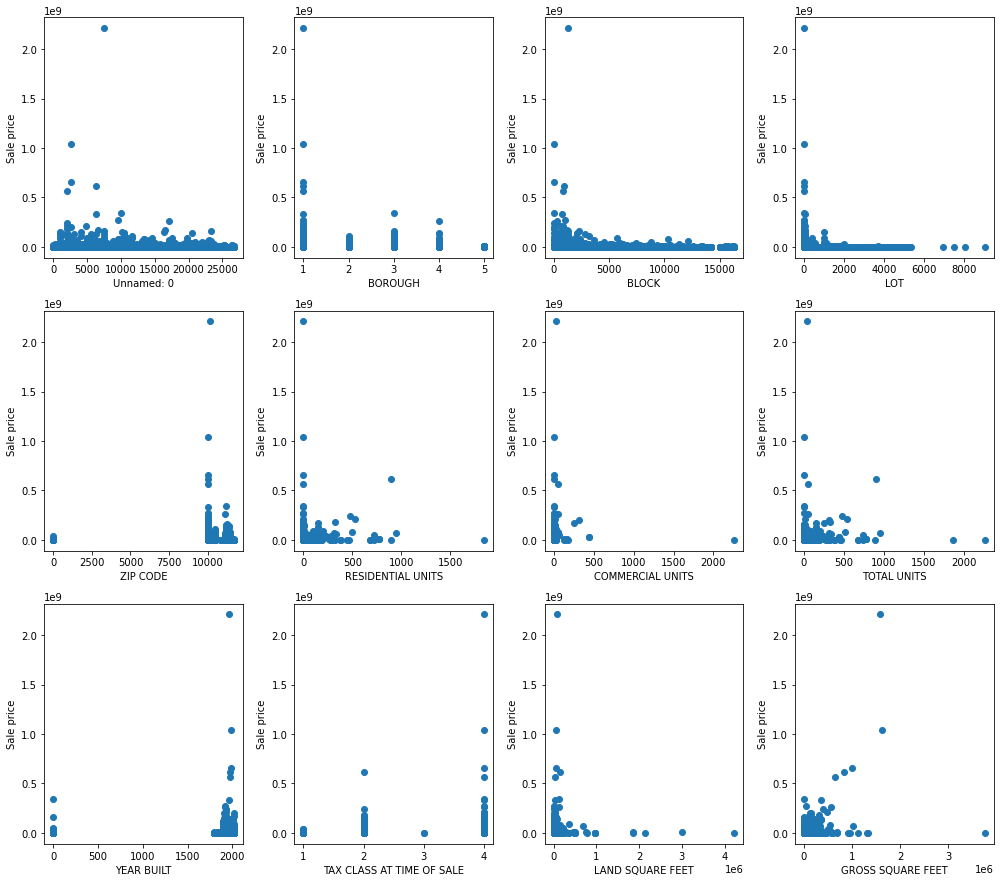

In [15]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14, 16))

for i in num_ftrs : 
    plt.subplot(a,b,c)
    plt.scatter(plot_dep[i], plot_indep)
    plt.xlabel(i)
    plt.ylabel('Sale price')
    c = c +1 
fig.tight_layout()
plt.show()

From the above plots, it can be seen that there a few outliers in the target variable (over 0.5e9). There are also missing values (0) in 'ZIP CODE', 'YEAT BULT' and 'SALE PRICE'. The target variable remains independent (flat) w.r.t 'Unnamed:0', 'BLOCK' and 'LOT'. Also it can be seen that although listed as numerical, 'BOROUGH', 'ZIP CODE',  and 'TAX CLASS AT TIME OF SALE' are categorical by nature. 

In [16]:
# Dropping columns that are not relevant
data.drop(columns=['Unnamed: 0', 'BLOCK', 'LOT'], axis=1, inplace=True)

In [17]:
# Dropping rows with missing values of zeros
data = data[data['YEAR BUILT'] != 0]
data = data[data['ZIP CODE'] != 0]
data = data[data['SALE PRICE'] != 0]

Categorical Variables

In [18]:
# Converting 'BOROUGH' and 'TAX CLASS AT TIME OF SALE' to categorical 
data['BOROUGH'] = data['BOROUGH'].astype(str)
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype(str)

In [19]:
obj = data.dtypes == 'object'
cat_ftrs = list(obj[obj].index)
cat_ftrs

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE DATE']

In [20]:
#Checking for most frequent categories
for i in cat_ftrs:
    print('For feature {}, most frequent value is "{}"'.format(i, data[i].value_counts().idxmax()))

For feature BOROUGH, most frequent value is "3"
For feature NEIGHBORHOOD, most frequent value is "BEDFORD STUYVESANT"
For feature BUILDING CLASS CATEGORY, most frequent value is "01 ONE FAMILY DWELLINGS                    "
For feature TAX CLASS AT PRESENT, most frequent value is "1"
For feature EASE-MENT, most frequent value is " "
For feature BUILDING CLASS AT PRESENT, most frequent value is "A1"
For feature ADDRESS, most frequent value is "429 KENT AVENUE"
For feature APARTMENT NUMBER, most frequent value is " "
For feature TAX CLASS AT TIME OF SALE, most frequent value is "1"
For feature BUILDING CLASS AT TIME OF SALE, most frequent value is "A1"
For feature SALE DATE, most frequent value is "2017-04-28 00:00:00"


In [21]:
data['EASE-MENT'].value_counts()

     36172
Name: EASE-MENT, dtype: int64

In [22]:
# Deleting 'EASE_MENT' colums as it is empty 

data.drop(columns='EASE-MENT', inplace=True)
cat_ftrs.remove('EASE-MENT')

In [23]:
# Value counts of each category
for i in cat_ftrs :
    vals = len(data[i].value_counts())
    blnks = len(data[data[i] == ' '])
    print('For feature {} :'. format(i))
    print('Number of unique values : {} \nNumber of rows with blanks: {} \n'.format(vals, blnks))

For feature BOROUGH :
Number of unique values : 5 
Number of rows with blanks: 0 

For feature NEIGHBORHOOD :
Number of unique values : 250 
Number of rows with blanks: 0 

For feature BUILDING CLASS CATEGORY :
Number of unique values : 45 
Number of rows with blanks: 0 

For feature TAX CLASS AT PRESENT :
Number of unique values : 9 
Number of rows with blanks: 0 

For feature BUILDING CLASS AT PRESENT :
Number of unique values : 147 
Number of rows with blanks: 0 

For feature ADDRESS :
Number of unique values : 33100 
Number of rows with blanks: 0 

For feature APARTMENT NUMBER :
Number of unique values : 1043 
Number of rows with blanks: 32464 

For feature TAX CLASS AT TIME OF SALE :
Number of unique values : 3 
Number of rows with blanks: 0 

For feature BUILDING CLASS AT TIME OF SALE :
Number of unique values : 148 
Number of rows with blanks: 0 

For feature SALE DATE :
Number of unique values : 340 
Number of rows with blanks: 0 



Given that there are a lot of missing values for Apartment number variable and high number of unique values of Address, they cannot be used in further analysis. These two columns can be dropped from the data

In [24]:
# Dropping 'ADDRESS' and 'APARTMENT NUMBER' variables 

data.drop(columns=['ADDRESS', 'APARTMENT NUMBER'], axis=1, inplace=True)

Plotting Categorical data

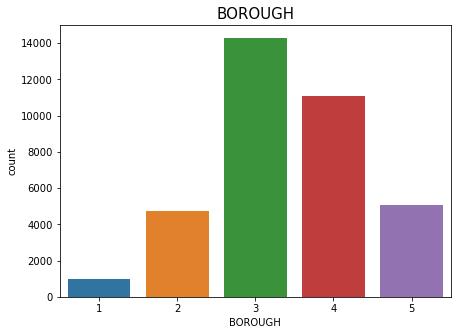

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'BOROUGH',
            data = data)
plt.title('BOROUGH', fontsize=15);

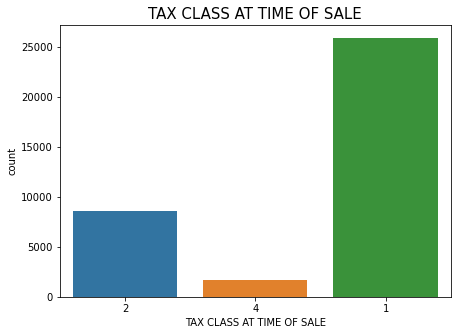

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'TAX CLASS AT TIME OF SALE',
            data = data)
plt.title('TAX CLASS AT TIME OF SALE', fontsize=15);

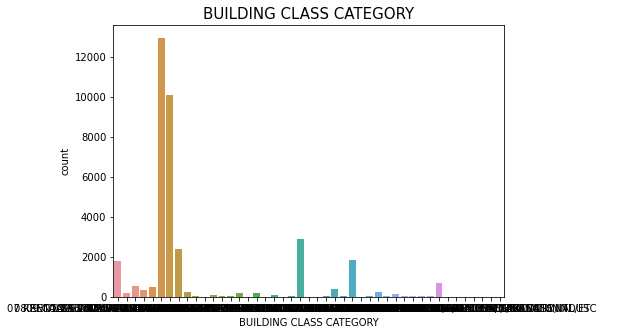

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'BUILDING CLASS CATEGORY',
            data = data)
plt.title('BUILDING CLASS CATEGORY', fontsize=15);

The bulk of the house sales happened in few building categories. Lets look at some numbers to confirm this.

In [28]:
data['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         12938
02 TWO FAMILY DWELLINGS                         10100
10 COOPS - ELEVATOR APARTMENTS                   2866
03 THREE FAMILY DWELLINGS                        2411
13 CONDOS - ELEVATOR APARTMENTS                  1852
07 RENTALS - WALKUP APARTMENTS                   1802
15 CONDOS - 2-10 UNIT RESIDENTIAL                 666
09 COOPS - WALKUP APARTMENTS                      556
22 STORE BUILDINGS                                489
04 TAX CLASS 1 CONDOS                             382
14 RENTALS - 4-10 UNIT                            336
12 CONDOS - WALKUP APARTMENTS                     247
21 OFFICE BUILDINGS                               227
08 RENTALS - ELEVATOR APARTMENTS                  207
29 COMMERCIAL GARAGES                             179
30 WAREHOUSES                                     168
44 CONDO PARKING                                  143
27 FACTORIES                                      109
26 OTHER HOTELS             

In [29]:
print('Sum of all the sales from top 6 categories of buliding class:', 
      data['BUILDING CLASS CATEGORY'].value_counts()[0:6].sum())
print('Sum of the sales from rest of the categorues:', data['BUILDING CLASS CATEGORY'].value_counts()[6:45].sum())

Sum of all the sales from top 6 categories of buliding class: 31969
Sum of the sales from rest of the categorues: 4203


From the above results the first six categories of the building class categories can be used in our analysis as it contains the majority of the sales. Before processing further lets look at the correlation matrix on the data

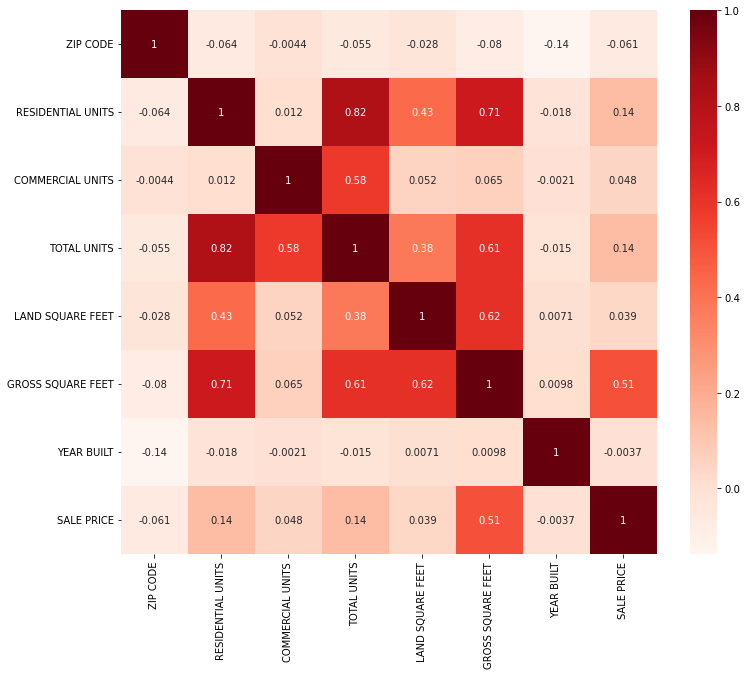

In [30]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix shows that the sale price has correlation with gross square feet area, larger the area. higher the sale price. Gross square feet area itself is correlated to residential units, total units and land sqaure feet. Residential units is highly correlated to total units. 

### Data preprocessing and Feature Engineering

Outliers in Target Variable

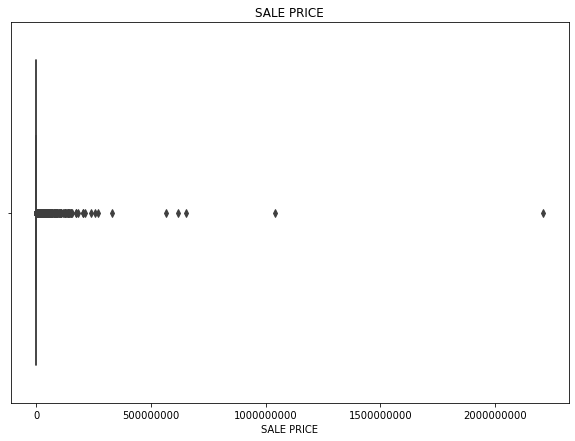

In [31]:
plt.figure(figsize=(10,7))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('SALE PRICE')
plt.show()

Removing the outliers in the sale price and plotting the distribution

In [32]:
data = data[(data["SALE PRICE"] > 10000) & (data['SALE PRICE'] < 5e8)]

Missing values in the data

In [33]:
num = data.dtypes == 'int'
flt = data.dtypes == 'float'
num_ftrs = list(num[num].index)
num_ftrs.extend(list(flt[flt].index))
num_ftrs

['ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'YEAR BUILT',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'SALE PRICE']

In [34]:
# Checking for missing values that are zeros in the data 
miss_list = []
for i in num_ftrs : 
    x = len(data[data[i] == 0])
    print('{} has {} missing values as 0'.format(i, x))
    if x > 0 :
        miss_list.append(i)

ZIP CODE has 0 missing values as 0
RESIDENTIAL UNITS has 4836 missing values as 0
COMMERCIAL UNITS has 32456 missing values as 0
TOTAL UNITS has 3436 missing values as 0
YEAR BUILT has 0 missing values as 0
LAND SQUARE FEET has 6696 missing values as 0
GROSS SQUARE FEET has 6761 missing values as 0
SALE PRICE has 0 missing values as 0


Most values for 'COMMERCIAL UNITS' are missing and hence it can dropped from the analysis. 

In [35]:
data.drop('COMMERCIAL UNITS', axis=1, inplace=True)

In [36]:
miss_list.remove('COMMERCIAL UNITS')

There are missing values still present in the data. There are two ways of dealing with these missing values. 1) They can be imputed with respective mean values of the variable. 2) Removing these data points to keep to avoid manupulating the data and keeping the original data intact. In this step I chose to remove these datapoints

In [37]:
# Dropping zero missing values from independent variables
for i in miss_list:
    data = data[data[i] !=0]
data.shape

(27135, 15)

As discussed in the previous section, we are selecting the data of top Building class categories for our analysis.

In [38]:
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].str.strip()

In [39]:
data = data[(data['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') | (data['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS')
            | (data['BUILDING CLASS CATEGORY'] == '10 COOPS - ELEVATOR APARTMENTS') | (data['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS')
            | (data['BUILDING CLASS CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS') | (data['BUILDING CLASS CATEGORY'] == '07 RENTALS - WALKUP APARTMENTS')]

In [40]:
#Dropping categorical variables 
data.drop(columns=['NEIGHBORHOOD','BUILDING CLASS AT PRESENT', 'ZIP CODE','BUILDING CLASS AT TIME OF SALE','SALE DATE'], axis=1, inplace=True)

In [41]:
data.dtypes

BOROUGH                       object
BUILDING CLASS CATEGORY       object
TAX CLASS AT PRESENT          object
RESIDENTIAL UNITS              int64
TOTAL UNITS                    int64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                     int64
TAX CLASS AT TIME OF SALE     object
SALE PRICE                   float64
dtype: object

The three remaining categorical variables in the data need to be transformed using one hot encoding

In [42]:
cat_var = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']
one_hot_cols = pd.get_dummies(data[cat_var])
one_hot_cols.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26395 entries, 0 to 84545
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   BOROUGH_1                                               26395 non-null  uint8
 1   BOROUGH_2                                               26395 non-null  uint8
 2   BOROUGH_3                                               26395 non-null  uint8
 3   BOROUGH_4                                               26395 non-null  uint8
 4   BOROUGH_5                                               26395 non-null  uint8
 5   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS         26395 non-null  uint8
 6   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS         26395 non-null  uint8
 7   BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS       26395 non-null  uint8
 8   BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS  

In [43]:
final_data = data.drop(cat_var, axis =1)
final_data = pd.concat([final_data, one_hot_cols], axis=1)
final_data.head()

,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2
0,5,5,1633.0,6440.0,1900,6625000.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10,10,2272.0,6794.0,1913,3936272.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,6,6,2369.0,4615.0,1900,8000000.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6,8,8,1750.0,4226.0,1920,3192840.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
206,1,1,1975.0,3855.0,1901,7425000.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Modeling and Evaluation

Generating the input to the models with relevant features

In [44]:
X = final_data.drop('SALE PRICE', axis=1)
y = final_data['SALE PRICE']

In [45]:
X.shape, y.shape

((26395, 22), (26395,))

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Here we are using four different regression models, Linear, Ridge, Lasso and Randomforest to model the data

Linear Regression

In [47]:
LR = LinearRegression()
LR.fit(X_train, y_train)
ypred_LR = LR.predict(X_test)
print('Score of train data for Linear Regression:', LR.score(X_train,y_train))
print('RMSE for Linear Regression:', np.sqrt(mean_squared_error(ypred_LR, y_test)))
print('Score of test data for Linear Regression:', LR.score(X_test,y_test))

Score of train data for Linear Regression: 0.3349760883866735
RMSE for Linear Regression: 1055484.972659921
Score of test data for Linear Regression: 0.4186119659949401


Ridge Regression

In [48]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ypred_ridge = ridge.predict(X_test)
print('Score of train data for Ridge Regression:', ridge.score(X_train,y_train))
print('RMSE for Ridge Regression:', np.sqrt(mean_squared_error(ypred_ridge, y_test)))
print('Score of test data for Linear Regression:', ridge.score(X_test,y_test))

Score of train data for Ridge Regression: 0.3349367875870325
RMSE for Ridge Regression: 1054267.2577232283
Score of test data for Linear Regression: 0.41995268902019645


Lasso Regression

In [49]:
las = Lasso()
las.fit(X_train, y_train)
ypred_las= las.predict(X_test)
print('Score of train data for Lasso Regression:', las.score(X_train,y_train))
print('RMSE for Lasso Regression:', np.sqrt(mean_squared_error(ypred_las, y_test)))
print('Score of test data for Lasso Regression:', las.score(X_test,y_test))

Score of train data for Lasso Regression: 0.3339703992634824
RMSE for Lasso Regression: 1062341.2934690972
Score of test data for Lasso Regression: 0.41103416073116994


/Users/priyadas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.061e+16, tolerance: 9.193e+12
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor

In [50]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
ypred_RF = RF.predict(X_test)
print('Score of train data for Random Forest Regressor:', LR.score(X_train,y_train))
print('RMSE for Random Forest Regressor:', np.sqrt(mean_squared_error(ypred_RF, y_test)))
print('Score of test data for Random Forest Regressor:', RF.score(X_test,y_test))

Score of train data for Random Forest Regressor: 0.3349760883866735
RMSE for Random Forest Regressor: 1080577.2343781563
Score of test data for Random Forest Regressor: 0.3906404706043952


### Conclusion

The NYC real estate data has been analysed and cleaned before building a model for sale price prediction. The data had a lot of missing values in the form of characters and 0. The missing values of the data has been deleted tp preserve the original data. The data also consisted of more categorical variables than numerical variables. For this analysis and modelling, some categorical variables were introduced through one hot encoding. The price prediction was achieved by using four different regression models: Linear, Ridge, Lasso and Random Forest. The model functioning in prediction of the price was evaluated using the root mean squares error and score feature. 

The score for train data from each model was close to 0.34 and very high rmse in the order of 1e6. The score for test data is also around 0.41 for all the models except for Random Forest (0.39). The low scores and high rmse indicate that the model failed to capture the important features of the data. The model could be improved, in my opinion, by introducing more categorical variables in the analysis. Other factors that might be impacting the performance of the model are wide range of sale price and deleting the missing values. By narrowing the sale price through removing outliers & scaling and imputing the missing values might improve the model performance.